In [54]:
# NOTE: 

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

crime = pd.read_csv('E:/Vancouver Crime Final/Synthetic Data/both_bne_100k_notwithin_1week_100m.csv')

crime.head(20)

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,Break and Enter Commercial,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,Break and Enter Residential/Other,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,Break and Enter Residential/Other,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
5,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,0,4.000000,25XX GRAVELEY ST,496100.23,...,0,7,73,21.6,0.0,21.6,5.5,88.0,101.70,9.53
6,Break and Enter Residential/Other,2003-01-01 04:04:00,2003,1,1,4,30,4.500000,15XX SE MARINE DR,494572.37,...,1,0,41,21.6,0.0,21.6,5.5,88.0,101.70,9.53
7,Break and Enter Commercial,2003-01-01 06:06:00,2003,1,1,6,0,6.000000,5XX W GEORGIA ST,491507.39,...,10,2,27,21.6,0.0,21.6,5.5,96.0,101.58,9.53
8,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,18XX W 57TH AVE,489132.03,...,0,8,73,21.6,0.0,21.6,5.8,95.0,101.50,9.53
9,Break and Enter Commercial,2003-01-01 07:07:00,2003,1,1,7,13,7.216667,45XX FRASER ST,493431.80,...,2,2,19,21.6,0.0,21.6,5.8,95.0,101.50,9.53


In [55]:
# Set Break and ENters to 1 and everything else to 0

crime = crime.replace(['NONE'], 0)

crime = crime.replace(['Break and Enter Residential/Other', 'Break and Enter Commercial'], 1)
crime.head()

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.12,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.95,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.11,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.46,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.84,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53


In [56]:
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,9XX W 15TH AVE,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,2003-01-01 00:00:00,2003,1,1,0,0,0.000000,64XX VICTORIA DR,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,2003-01-01 00:00:00,2003,1,1,0,1,0.016667,34XX W 42ND AVE,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,2003-01-01 00:00:00,2003,1,1,0,20,0.333333,19XX PARKER ST,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2003-01-01 01:01:00,2003,1,1,1,46,1.766667,45XX MAIN ST,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204570,0,2013-05-01 21:53:00,2013,5,1,21,53,21.883333,35XX TOLBOOTH,497860.233100,...,1,1,29,0.0,0.0,0.0,11.0,45.0,103.50,15.86
204571,0,2013-04-16 05:33:00,2013,4,16,5,33,5.550000,25XX NANAIMO ST,495880.968016,...,1,10,41,0.0,0.0,0.0,4.0,73.0,102.52,14.94
204572,0,2005-10-16 01:58:00,2005,10,16,1,58,1.966667,12XX VERNON DR,494281.898055,...,1,0,12,20.2,0.0,20.2,11.5,95.0,101.61,11.81
204573,0,2011-06-10 01:03:00,2011,6,10,1,3,1.050000,55XX COLUMBIA ST,491945.209888,...,0,8,72,0.0,0.0,0.0,13.5,83.0,101.86,17.58


In [57]:
### Begin Processing the Data


# Import Pre-processing module
from sklearn import preprocessing

# Create Label Encoder
le = preprocessing.LabelEncoder()

# Convert the string columns to numeric
# .astype(str) to ensude they are read as strings and not as mixed types
crime['datetime'] = le.fit_transform(crime['datetime'].astype(str))
crime['hundred_block'] = le.fit_transform(crime['hundred_block'].astype(str))


# Display the results
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0,2003,1,1,0,0,0.000000,14731,490791.120000,...,2,0,32,21.6,0.0,21.6,5.8,81.0,101.70,9.53
1,1,0,2003,1,1,0,0,0.000000,11790,495220.950000,...,2,5,40,21.6,0.0,21.6,5.8,81.0,101.70,9.53
2,1,0,2003,1,1,0,1,0.016667,7233,486837.110000,...,3,6,38,21.6,0.0,21.6,5.8,81.0,101.70,9.53
3,1,0,2003,1,1,0,20,0.333333,2664,495279.460000,...,1,8,88,21.6,0.0,21.6,5.8,81.0,101.70,9.53
4,1,2,2003,1,1,1,46,1.766667,9138,492627.840000,...,2,8,83,21.6,0.0,21.6,6.2,78.0,101.73,9.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204570,0,107864,2013,5,1,21,53,21.883333,7428,497860.233100,...,1,1,29,0.0,0.0,0.0,11.0,45.0,103.50,15.86
204571,0,107430,2013,4,16,5,33,5.550000,4659,495880.968016,...,1,10,41,0.0,0.0,0.0,4.0,73.0,102.52,14.94
204572,0,31269,2005,10,16,1,58,1.966667,793,494281.898055,...,1,0,12,20.2,0.0,20.2,11.5,95.0,101.61,11.81
204573,0,89506,2011,6,10,1,3,1.050000,10420,491945.209888,...,0,8,72,0.0,0.0,0.0,13.5,83.0,101.86,17.58


In [58]:
# Scale the Data

columns = [col for col in crime if col not in ['type']]


# Properly scale the reduced set of features
features = crime[columns]

from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(features))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [59]:
# Properly scale the features

columns = [col for col in crime if col not in ['type']]

# Properly scale the reduced set of features
features = crime[columns]


scaler = MinMaxScaler().fit(features.values) # scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values) # features = scaler.transform(features.values)
crime[columns] = features
crime

,type,datetime,year,month,day,hour,minute,Hour_Minute,hundred_block,utm_x,...,signal_200,trees_25,trees_100,rain_mm,snow_cm,total_precip_mm,temp_c,humidity,pressure,hours_of_light
0,1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.674898,0.485335,...,0.142857,0.00000,0.244275,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
1,1,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540157,0.788733,...,0.142857,0.15625,0.305344,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
2,1,0.000000,0.000,0.000000,0.000000,0.000000,0.016949,0.000695,0.331379,0.214525,...,0.214286,0.18750,0.290076,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
3,1,0.000000,0.000,0.000000,0.000000,0.000000,0.338983,0.013899,0.122051,0.792740,...,0.071429,0.25000,0.671756,0.235808,0.0,0.235808,0.408421,0.781609,0.609459,0.010909
4,1,0.000012,0.000,0.000000,0.000000,0.043478,0.779661,0.073662,0.418656,0.611131,...,0.142857,0.25000,0.633588,0.235808,0.0,0.235808,0.416842,0.747126,0.613514,0.010909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204570,0,0.636204,0.625,0.363636,0.000000,0.913043,0.898305,0.912439,0.340312,0.969497,...,0.071429,0.03125,0.221374,0.000000,0.0,0.000000,0.517895,0.367816,0.852703,0.778182
204571,0,0.633645,0.625,0.272727,0.500000,0.217391,0.559322,0.231411,0.213451,0.833938,...,0.071429,0.31250,0.312977,0.000000,0.0,0.000000,0.370526,0.689655,0.720270,0.666667
204572,0,0.184431,0.125,0.818182,0.500000,0.043478,0.983051,0.082001,0.036331,0.724418,...,0.071429,0.00000,0.091603,0.220524,0.0,0.220524,0.528421,0.942529,0.597297,0.287273
204573,0,0.527925,0.500,0.454545,0.300000,0.043478,0.050847,0.043780,0.477390,0.564378,...,0.000000,0.25000,0.549618,0.000000,0.0,0.000000,0.570526,0.804598,0.631081,0.986667


In [60]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 29)


In [61]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.03490129 0.01965601 0.01333065 0.02119106 0.01902308 0.2407082
 0.0372564  0.17109237 0.03652026 0.04634953 0.04137386 0.03628394
 0.01000177 0.01477903 0.01937537 0.03383527 0.00197586 0.00237521
 0.00928657 0.01982228 0.0193742  0.02888895 0.01182225 0.00107127
 0.01183066 0.02500875 0.02251335 0.02538143 0.02497111]
[ True False False False False  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False]


,importance
minute,0.240708
hundred_block,0.171092
utm_y,0.046350
latitude,0.041374
Hour_Minute,0.037256
utm_x,0.036520
longitude,0.036284
datetime,0.034901
light_pole_100,0.033835
trees_100,0.028889


In [62]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'hour', 'minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 24)


In [63]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04341847 0.02163794 0.0351127  0.06980062 0.21848873 0.0706555
 0.08059642 0.01590353 0.02269914 0.03222563 0.0496     0.00329991
 0.00356805 0.01357237 0.0295401  0.03162631 0.04992931 0.01995348
 0.0015959  0.02033769 0.04307232 0.03838039 0.04315413 0.04183135]
[ True False False  True  True  True  True False False False  True False
 False False False False  True False False False  True False  True  True]


,importance
hundred_block,0.218489
utm_y,0.080596
utm_x,0.070656
Hour_Minute,0.069801
trees_100,0.049929
light_pole_100,0.049600
year,0.043418
pressure,0.043154
temp_c,0.043072
hours_of_light,0.041831


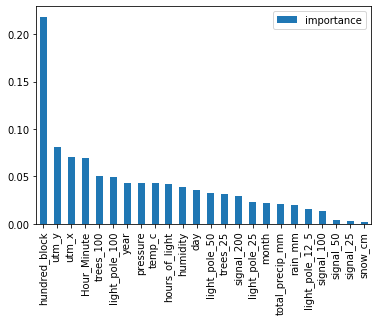

In [64]:
feature_importances.plot.bar()

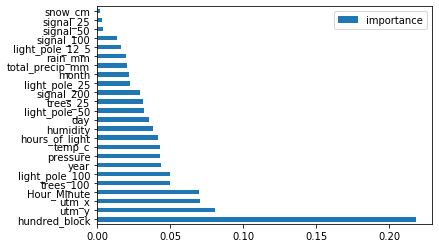

In [65]:
feature_importances.plot.barh()

In [66]:
# Simple Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# import needed modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [67]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[39788 30598]
 [10347 62469]]
              precision    recall  f1-score   support

           0       0.79      0.57      0.66     70386
           1       0.67      0.86      0.75     72816

    accuracy                           0.71    143202
   macro avg       0.73      0.71      0.71    143202
weighted avg       0.73      0.71      0.71    143202



In [69]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[16767 13285]
 [ 4425 26896]]
              precision    recall  f1-score   support

           0       0.79      0.56      0.65     30052
           1       0.67      0.86      0.75     31321

    accuracy                           0.71     61373
   macro avg       0.73      0.71      0.70     61373
weighted avg       0.73      0.71      0.70     61373



In [70]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 24)


In [71]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04444016 0.02284751 0.03698273 0.04245061 0.22240054 0.0731894
 0.08312873 0.01573399 0.02286218 0.03386622 0.05080099 0.00337705
 0.00351465 0.01350509 0.02971342 0.03278718 0.05167222 0.02113812
 0.00164496 0.02092287 0.04440418 0.0395708  0.04517906 0.04386734]
[ True False False  True  True  True  True False False False  True False
 False False False False  True False False False  True False  True  True]


,importance
hundred_block,0.222401
utm_y,0.083129
utm_x,0.073189
trees_100,0.051672
light_pole_100,0.050801
pressure,0.045179
year,0.044440
temp_c,0.044404
hours_of_light,0.043867
hour,0.042451


In [72]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(24, 24, 24), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[44385 26001]
 [12175 60641]]
              precision    recall  f1-score   support

           0       0.78      0.63      0.70     70386
           1       0.70      0.83      0.76     72816

    accuracy                           0.73    143202
   macro avg       0.74      0.73      0.73    143202
weighted avg       0.74      0.73      0.73    143202



In [74]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[18676 11376]
 [ 5232 26089]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69     30052
           1       0.70      0.83      0.76     31321

    accuracy                           0.73     61373
   macro avg       0.74      0.73      0.73     61373
weighted avg       0.74      0.73      0.73     61373



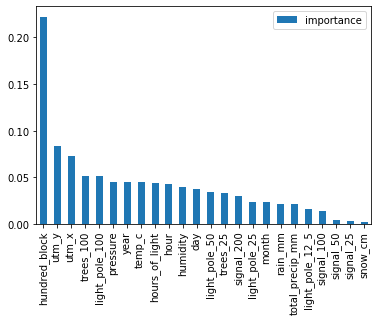

In [75]:
feature_importances.plot.bar()

In [76]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'datetime']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 25)


In [77]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.03104295 0.01598248 0.0258966  0.02982947 0.25294445 0.19130618
 0.05023588 0.05985743 0.0115528  0.01733947 0.02310585 0.03848349
 0.00219244 0.00287152 0.0137132  0.02585502 0.02304474 0.03491019
 0.01426258 0.00123532 0.01434777 0.03063849 0.02770862 0.03135884
 0.03028421]
[False False False False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False]


,importance
minute,0.252944
hundred_block,0.191306
utm_y,0.059857
utm_x,0.050236
light_pole_100,0.038483
trees_100,0.034910
pressure,0.031359
year,0.031043
temp_c,0.030638
hours_of_light,0.030284


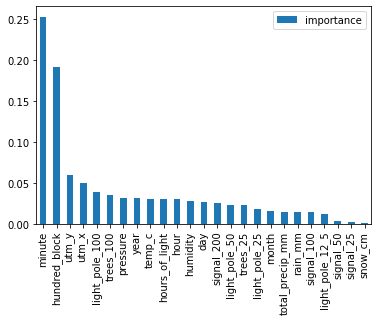

In [78]:
feature_importances.plot.bar()

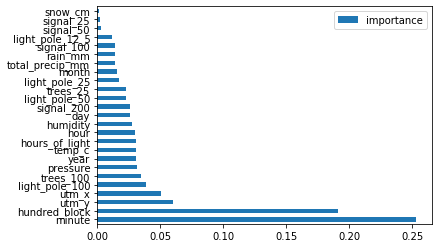

In [79]:
feature_importances.plot.barh()

In [80]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(25, 25, 25), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[60480  9906]
 [17933 54883]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     70386
           1       0.85      0.75      0.80     72816

    accuracy                           0.81    143202
   macro avg       0.81      0.81      0.81    143202
weighted avg       0.81      0.81      0.81    143202



In [82]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[25691  4361]
 [ 7850 23471]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     30052
           1       0.84      0.75      0.79     31321

    accuracy                           0.80     61373
   macro avg       0.80      0.80      0.80     61373
weighted avg       0.81      0.80      0.80     61373



In [83]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'datetime', 'rain_mm', 'snow_cm']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 23)


In [84]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.03211219 0.0168714  0.02661541 0.03106032 0.26698284 0.17166123
 0.0501688  0.06128653 0.01274278 0.01793021 0.02416522 0.04330661
 0.00224193 0.00298941 0.01061303 0.02532585 0.02352871 0.03587972
 0.01806122 0.03252846 0.02906832 0.03308439 0.03177542]
[False False False False  True  True  True  True False False False False
 False False False False False False False False False False False]


,importance
minute,0.266983
hundred_block,0.171661
utm_y,0.061287
utm_x,0.050169
light_pole_100,0.043307
trees_100,0.035880
pressure,0.033084
temp_c,0.032528
year,0.032112
hours_of_light,0.031775


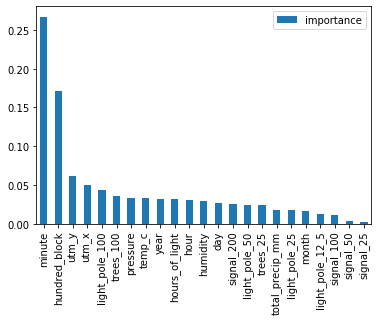

In [85]:
feature_importances.plot.bar()

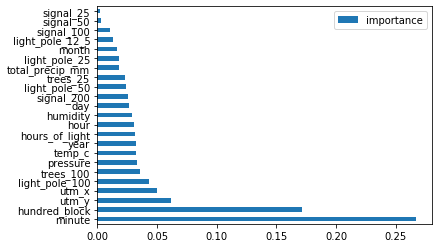

In [86]:
feature_importances.plot.barh()

In [87]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(23, 23, 23), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[61008  9378]
 [16849 55967]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     70386
           1       0.86      0.77      0.81     72816

    accuracy                           0.82    143202
   macro avg       0.82      0.82      0.82    143202
weighted avg       0.82      0.82      0.82    143202



In [89]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[25897  4155]
 [ 7391 23930]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     30052
           1       0.85      0.76      0.81     31321

    accuracy                           0.81     61373
   macro avg       0.82      0.81      0.81     61373
weighted avg       0.82      0.81      0.81     61373



In [90]:
# split training data into training and testing
from sklearn.model_selection import train_test_split

# Select columns to that are data
cols = [col for col in crime if col not in ['type', 'latitude', 'longitude', 'Hour_Minute', 'minute', 'datetime', 'rain_mm', 'snow_cm']]

X = crime[cols]

# Select target data
y = crime['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(143202, 22)


In [91]:
# Trying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())

feature_importances = pd.DataFrame(model_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

[0.04451376 0.02299273 0.03797452 0.04267732 0.22911682 0.07423632
 0.08574856 0.01583957 0.02382213 0.03357371 0.05219906 0.00283607
 0.00361985 0.01572747 0.02716652 0.0333572  0.05287329 0.02516407
 0.04548995 0.04050093 0.04614226 0.04442789]
[False False False False  True  True  True False False False  True False
 False False False False  True False  True False  True False]


,importance
hundred_block,0.229117
utm_y,0.085749
utm_x,0.074236
trees_100,0.052873
light_pole_100,0.052199
pressure,0.046142
temp_c,0.045490
year,0.044514
hours_of_light,0.044428
hour,0.042677


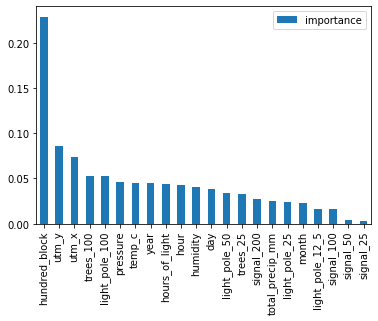

In [92]:
feature_importances.plot.bar()

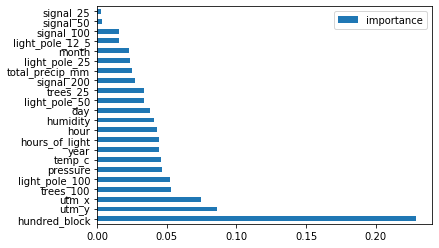

In [93]:
feature_importances.plot.barh()

In [94]:
# Try using the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(22, 22, 22), activation='relu', solver='adam', max_iter=300)
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[48417 21969]
 [16589 56227]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.72     70386
           1       0.72      0.77      0.74     72816

    accuracy                           0.73    143202
   macro avg       0.73      0.73      0.73    143202
weighted avg       0.73      0.73      0.73    143202



In [96]:
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

[[20368  9684]
 [ 7203 24118]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     30052
           1       0.71      0.77      0.74     31321

    accuracy                           0.72     61373
   macro avg       0.73      0.72      0.72     61373
weighted avg       0.73      0.72      0.72     61373



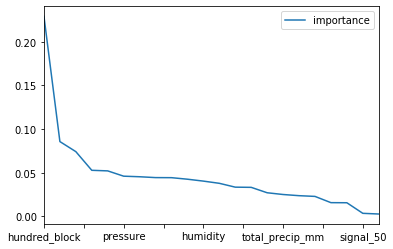

In [98]:
feature_importances.plot()